Nama : Ulan Sawalia

NPM  : 2108107010024

Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/yasserh/heart-disease-dataset/data 

dataset ini memprediksi penyakit jantung dengan 14 atribut

*Informasi Atribut: 
1. age	
2. sex
3. cp
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach	
9. exang
10. oldpeak
11. slope
12. ca	
13. thal
14. target

Studi Kasus : Memprediksi penyebab penyakit jantung

### Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart_data = pd.read_csv("heart.csv")
df_heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preprocessing Data

In [3]:
df_heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df_heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_heart_data.shape

(303, 14)

In [6]:
# cek duplicate value
print(df_heart_data.duplicated().sum())

1


In [7]:
# Menghapus baris yang merupakan duplikat
df_heart_data.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
df_heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# cek missing value
print(df_heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode the outcome column such that 1 means diabetes and 0 means no diabetes
label_encoder = LabelEncoder()
df_heart_data['target'] = label_encoder.fit_transform(df_heart_data['target'])

In [10]:
# Cek distribusi kelas pada dataset
print(df_heart_data['target'].value_counts())

1    164
0    138
Name: target, dtype: int64


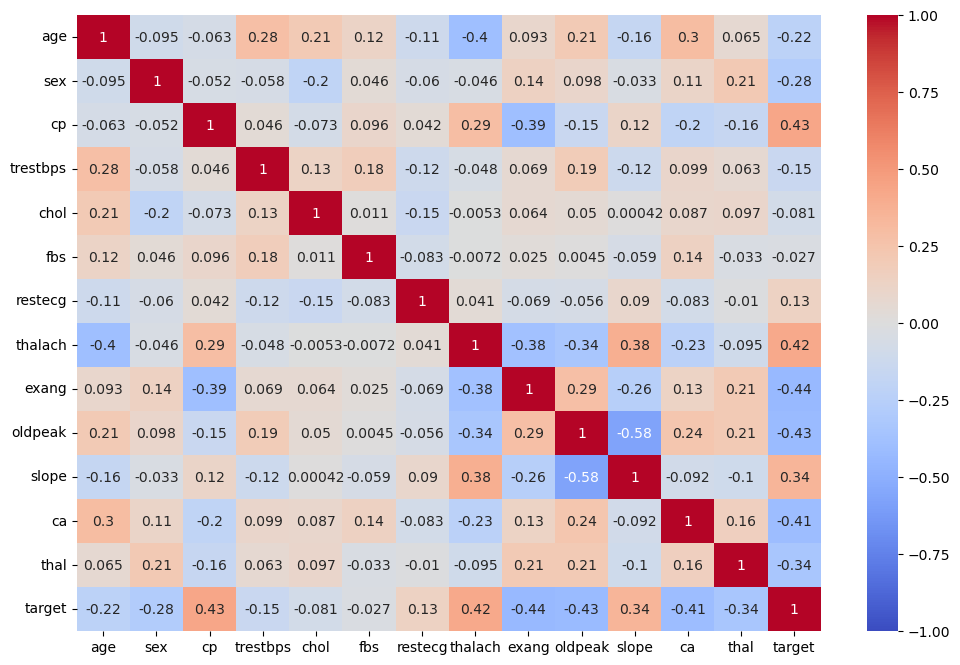

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df_heart_data.corr(),vmin = -1, vmax = +1,annot=True, cmap="coolwarm")
plt.show()

Korelasi berkisar antara -1 hingga +1, dimana:
* +1 menunjukkan korelasi positif sempurna, yaitu ketika satu variabel naik, variabel lainnya juga naik.
* -1 menunjukkan korelasi negatif sempurna, yaitu ketika satu variabel naik, variabel lainnya turun.
* Nilai 0 menunjukkan tidak ada korelasi antara variabel tersebut.
Warna merah menunjukkan korelasi positif, sedangkan warna biru menunjukkan korelasi negatif.

In [12]:
df_heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

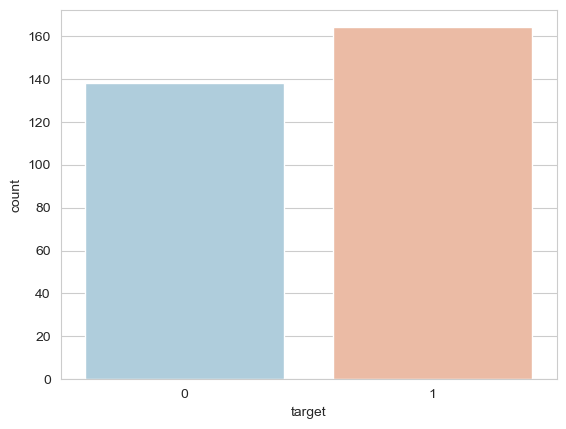

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df_heart_data,palette='RdBu_r')
plt.show()


sumbu x menunjukkan nilai-nilai unik dari kolom 'target', sementara sumbu y menunjukkan jumlah pengamatan untuk setiap nilai 'target'. dimana nilai 1 bernilai 160 sedangkan 0 bernilai 138.

In [14]:
cross_df = pd.crosstab(df_heart_data["age"], df_heart_data["target"])
cross_df.head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1


In [15]:
cross_df = pd.crosstab(df_heart_data["chol"], df_heart_data["target"])
cross_df.head()

target,0,1
chol,,
126,0,1
131,1,0
141,0,1
149,1,1
157,0,1


In [16]:
print(cross_df.shape)
print(cross_df.index)

(152, 2)
Int64Index([126, 131, 141, 149, 157, 160, 164, 166, 167, 168,
            ...
            341, 342, 353, 354, 360, 394, 407, 409, 417, 564],
           dtype='int64', name='chol', length=152)


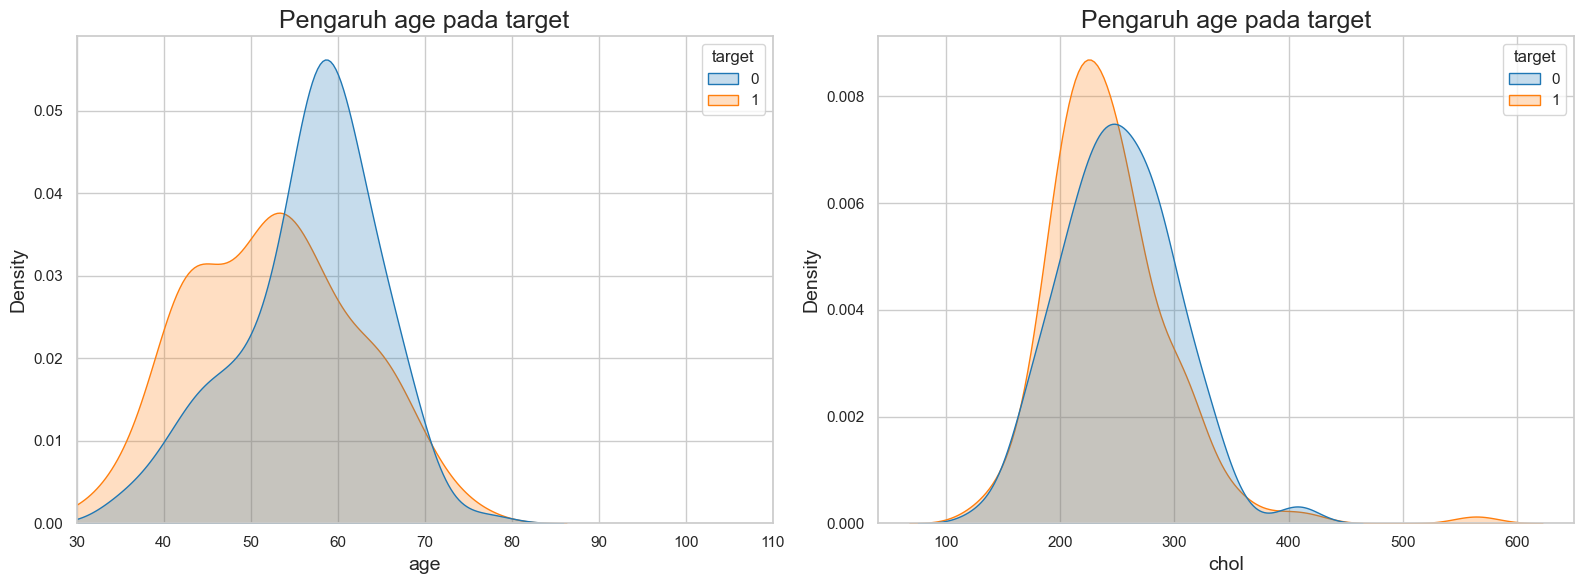

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot untuk variabel age
sns.kdeplot(data=df_heart_data, x='age', hue='target', ax=ax[0], fill=True, common_norm=False)
ax[0].set_title('Pengaruh age pada target', fontsize=18)
ax[0].set_xlabel('age', fontsize=14)
ax[0].set_ylabel('Density', fontsize=14)
ax[0].set_xlim([30, 110])

# KDE plot untuk variabel chol
sns.kdeplot(data=df_heart_data, x='chol', hue='target', ax=ax[1], fill=True, common_norm=False)
ax[1].set_title('Pengaruh age pada target', fontsize=18)
ax[1].set_xlabel('chol', fontsize=14)
ax[1].set_ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()


Dilihat dari plot dalam kedua plot diatas dapat diketahui sebarapa berperan age dan chol dalam penyebab penyakit jantung



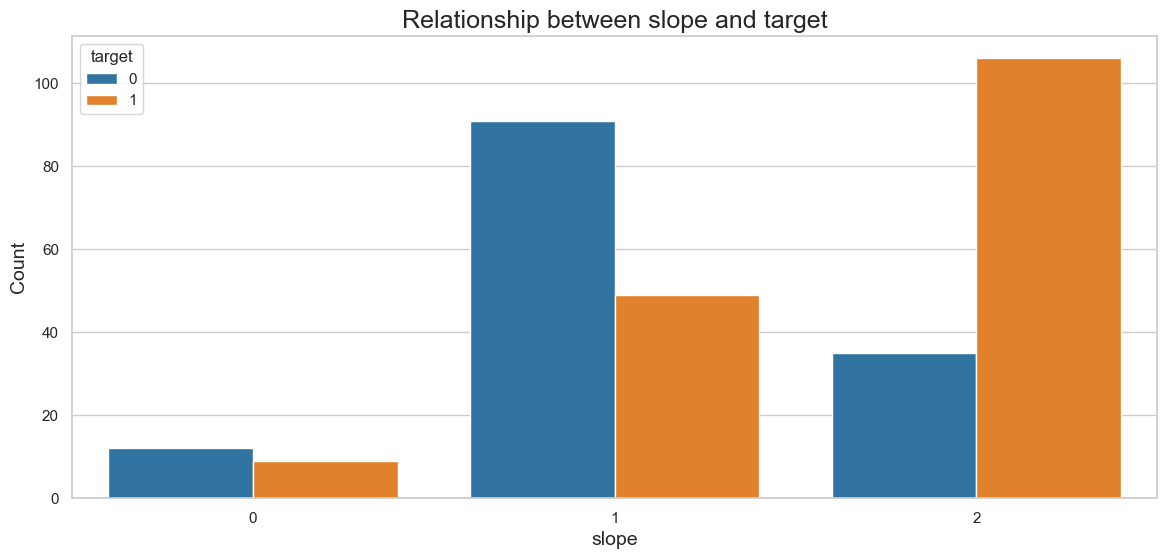

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(x='slope', hue='target', data=df_heart_data)
plt.title('Relationship between slope and target', fontsize=18)
plt.xlabel('slope', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


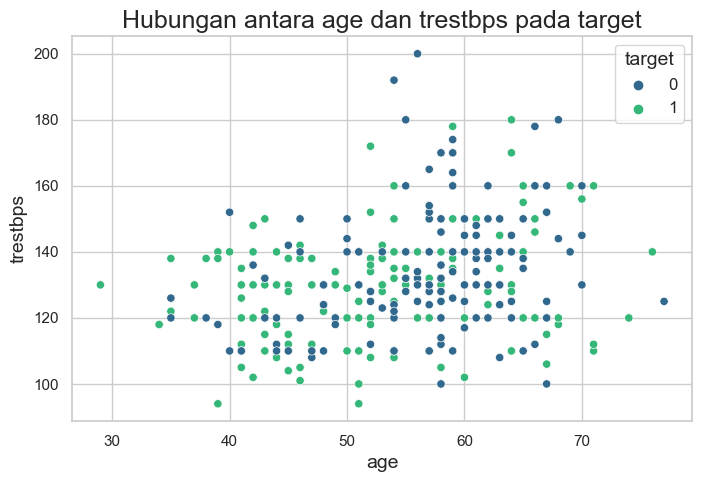

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='trestbps', data=df_heart_data, hue='target', palette='viridis')
plt.title('Hubungan antara age dan trestbps pada target', fontsize=18, loc='center')
plt.xlabel('age', fontsize=14)
plt.ylabel('trestbps', fontsize=14)
plt.legend(title='target', fontsize=12, title_fontsize='14')
plt.show()


### Split dataset dan normalisasi data

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = df_heart_data[['age', 'chol', 'slope', 'trestbps',]]
y = df_heart_data['target']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
X

,age,chol,slope,trestbps
0,63,233,0,145
1,37,250,0,130
2,41,204,2,130
3,56,236,2,120
4,57,354,2,120
...,...,...,...,...
298,57,241,1,140
299,45,264,1,110
300,68,193,1,144
301,57,131,1,130


### Membangun Model

In [22]:
# Import the support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(svc, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.77      0.62      0.69        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61




dapat dilihat bahwa hasil prediksi model SVC dengan kernel linear untuk semua atribut yang dipilih mempunyai skor akurasi 70%

In [23]:
# model linear SVM dengan variabel glucose dan bmi
svm_trestbps = SVC( kernel='linear',random_state=10)
svm_trestbps.fit(X_train[:, [0, 1]], y_train)

SVC(kernel='linear', random_state=10)

In [24]:
# model testing glucose bmi
y_pred_trestbps =svm_trestbps.predict(X_test[:, [0, 1]])
print("Classification Report:")
print(classification_report(y_test, y_pred_trestbps))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        29
           1       0.61      0.62      0.62        32

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61



In [25]:
# membangun model SVM dengan kernel rbf dan variabel glucose dan bmi
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X_train[:, [0, 1]], y_train)

SVC(C=10, gamma=1)

In [26]:
# Model testing and prediction
y_pred_rbf = svm_rbf.predict(X_test[:, [0, 1]])
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        29
           1       0.62      0.66      0.64        32

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.61        61



In [27]:
# model training age chol
svm_age_chol = SVC( kernel='linear',random_state=10)
svm_age_chol.fit(X_train[:, [0, 2]], y_train)

SVC(kernel='linear', random_state=10)

In [28]:
# model testing age chol
y_pred_chol =svm_age_chol.predict(X_test[:, [0, 2]])
print("Classification Report:")
print(classification_report(y_test, y_pred_chol))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.77      0.62      0.69        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



### Visualisasi Model

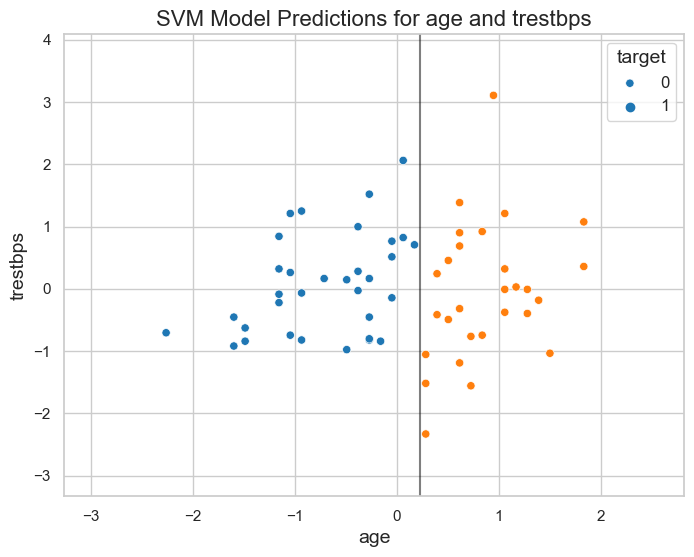

In [29]:
# Plot for age vs trestbps
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'green' for label in y_pred_trestbps]
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=colors, palette=None)  # Menggunakan warna merah dan hijau secara langsung
plt.xlabel('age', fontsize=14)
plt.ylabel('trestbps', fontsize=14)
plt.title('SVM Model Predictions for age and trestbps', fontsize=16)
plt.legend(title='target', fontsize=12, title_fontsize='14', labels=['0', '1'])  # Sesuaikan label sesuai dengan kelas yang diinginkan

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_trestbps.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


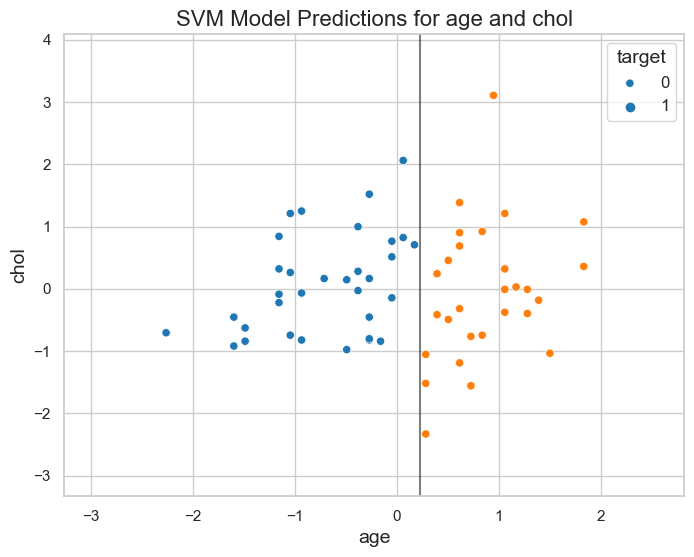

In [30]:
# Plot for age vs chol
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'green' for label in y_pred_trestbps]
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=colors, palette=None)
plt.xlabel('age', fontsize=14)
plt.ylabel('chol', fontsize=14)
plt.title('SVM Model Predictions for age and chol', fontsize=16)
plt.legend(title='target', fontsize=12, title_fontsize='14', labels=['0', '1'])

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_trestbps.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


### hyperparameter tuning

In [31]:
# hyperparameter
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
              'kernel': ['rbf', 'linear'],
              }

model1 = SVC()
# Create a GridSearchCV object
grid = GridSearchCV(model1, param_grid,cv=5, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# best hyperparameters
grid.best_params_

# best model
best_poly_svr = grid.best_estimator_

# Predict using the best model
y_pred = best_poly_svr.predict(X_test)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.592 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.673 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.729 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.592 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.5, kernel=rbf

In [32]:
print(grid.best_params_)
# Classification report
print(classification_report(y_test, y_pred))

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.77      0.62      0.69        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



Model yang didapat dengan hyperparameter tuning adalah model kernel RBF dengan parameter C: 0.1, gamma: 1 memperoleh akurasi 70%

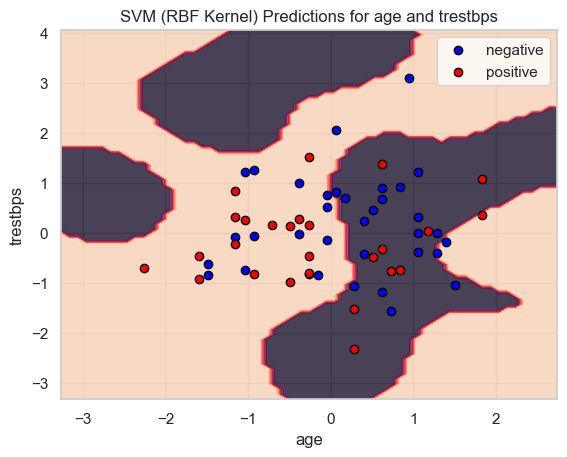

In [33]:
# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the scatter plot with specified labels
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='blue', label='negative', edgecolors='k')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='red', label='positive', edgecolors='k')

plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('SVM (RBF Kernel) Predictions for age and trestbps')

# Add legend
plt.legend()

plt.show()

Visualisasi prediksi model SVM (Support Vector Machine) dengan kernel RBF (Radial Basis Function) untuk dua fitur, yaitu umur ('age') dan tekanan darah istirahat ('trestbps'). 